## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

In [5]:
feature_names=list(data.columns)
feature_names.pop()
print(feature_names)

['x', 'y', 'z', 'x*x', '2*y', '2*z+3*x*x', 'w']


## Finding the Correlation between the features

In [6]:
correlation=data.corr()
print(correlation)

                  x         y         z       x*x       2*y  2*z+3*x*x  \
x          1.000000 -0.205926  0.812458  0.997947 -0.205926   0.996252   
y         -0.205926  1.000000 -0.602663 -0.209289  1.000000  -0.261123   
z          0.812458 -0.602663  1.000000  0.807137 -0.602663   0.847163   
x*x        0.997947 -0.209289  0.807137  1.000000 -0.209289   0.997457   
2*y       -0.205926  1.000000 -0.602663 -0.209289  1.000000  -0.261123   
2*z+3*x*x  0.996252 -0.261123  0.847163  0.997457 -0.261123   1.000000   
w          0.583277 -0.401790  0.674486  0.583803 -0.401790   0.606860   
target     0.728290 -0.690684  0.969990  0.719570 -0.690684   0.764729   

                  w    target  
x          0.583277  0.728290  
y         -0.401790 -0.690684  
z          0.674486  0.969990  
x*x        0.583803  0.719570  
2*y       -0.401790 -0.690684  
2*z+3*x*x  0.606860  0.764729  
w          1.000000  0.641750  
target     0.641750  1.000000  


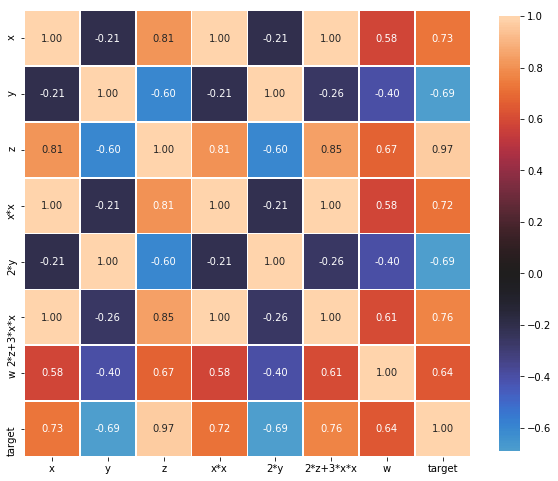

In [7]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1.0,center=0,fmt='.2f',square=True,linewidths=.5,annot=True,cbar_kws={"shrink": .80})
plt.show();

## TASK 1 Logistic Regression

### Finding the best model for the given data

In [8]:
clf =SGDClassifier(loss='log',tol=1e-3,alpha=0.0001,eta0=0.0001,learning_rate='constant')
clf.fit(X,Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=None, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
parameters={'alpha':np.logspace(-3,3,num=10)}

gscv= GridSearchCV(clf,parameters,cv= 10)
gscv.fit(X,Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0001,
                                     fit_intercept=True, l1_ratio=0.15,
                                     learning_rate='constant', loss='log',
                                     max_iter=1000, n_iter_no_change=5,
                                     n_jobs=None, penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000

In [10]:
bestalpha=gscv.best_params_['alpha']
print(bestalpha)

0.001


In [11]:
best_model=SGDClassifier(loss='log',tol=1e-3,alpha=bestalpha,eta0=0.0001,learning_rate='constant')
best_model.fit(X,Y)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=None, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

### Getting the weights with the original data

In [12]:
y_pred=best_model.predict(X)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [13]:
from sklearn.metrics import accuracy_score
best_model_accuracy=accuracy_score(Y,y_pred)
print(best_model_accuracy)

1.0


In [14]:
w=best_model.coef_
print(w)

[[ 0.27545672 -0.29961614  0.41298518  0.26959946 -0.29961614  0.2925026
   0.24487388]]


### Modifying original data

In [15]:
X_=X+0.01

In [16]:
best_model_edit=SGDClassifier(loss='log',tol=1e-3,alpha=bestalpha,eta0=0.0001,learning_rate='constant')
best_model_edit.fit(X_,Y)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=None, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
y_pred=best_model_edit.predict(X_)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [18]:
from sklearn.metrics import accuracy_score
best_model_accuracy_edit=accuracy_score(Y,y_pred)
print(best_model_accuracy_edit)

1.0


In [19]:
w_edit=best_model_edit.coef_
print(w_edit)

[[ 0.27557379 -0.29954096  0.41304048  0.26971998 -0.29954096  0.29261692
   0.24493493]]


### Checking deviations in metric and weights

In [20]:
accuracy_diff=best_model_accuracy_edit-best_model_accuracy
print(accuracy_diff)

0.0


In [21]:
w_diff=np.absolute(w_edit-w)
print(w_diff)

[[1.17065233e-04 7.51832910e-05 5.52989908e-05 1.20524169e-04
  7.51832910e-05 1.14317116e-04 6.10451117e-05]]


In [22]:
index=(np.argsort(w_diff)[0])[::-1][0:4]
print("top 4 features")
print(np.take(feature_names,index))

top 4 features
['x*x' 'x' '2*z+3*x*x' '2*y']


<h2>observations:</h2><br>
1.Accuracy of the model does not change before and after perturbation test <br>
2.features are non collinear because weights before and after perturbation test doesnot change significantly.<br>
  So,these weights can used for getting feature importance.

## TASK 2 Linear SVM

### Finding the best model for the given data

In [23]:
clf =SGDClassifier(loss='hinge',tol=1e-3,alpha=0.0001,eta0=0.0001,learning_rate='constant')
clf.fit(X,Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='hinge', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=None, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
parameters={'alpha':np.logspace(-3,3,num=10)}

gscv= GridSearchCV(clf,parameters,cv= 10)
gscv.fit(X,Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0001,
                                     fit_intercept=True, l1_ratio=0.15,
                                     learning_rate='constant', loss='hinge',
                                     max_iter=1000, n_iter_no_change=5,
                                     n_jobs=None, penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.000

In [25]:
bestalpha=gscv.best_params_['alpha']
print(bestalpha)

0.001


In [26]:
best_model=SGDClassifier(loss='hinge',tol=1e-3,alpha=bestalpha,eta0=0.0001,learning_rate='constant')
best_model.fit(X,Y)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='hinge', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=None, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

### Getting the weights with the original data

In [27]:
y_pred=best_model.predict(X)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [28]:
from sklearn.metrics import accuracy_score
best_model_accuracy=accuracy_score(Y,y_pred)
print(best_model_accuracy)

1.0


In [29]:
w=best_model.coef_
print(w)

[[ 0.21169674 -0.27080862  0.3785204   0.20422448 -0.27080862  0.22950351
   0.18892872]]


### Modifying original data

In [30]:
X_=X+0.01

In [31]:
best_model_edit=SGDClassifier(loss='hinge',tol=1e-3,alpha=bestalpha,eta0=0.0001,learning_rate='constant')
best_model_edit.fit(X_,Y)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='hinge', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=None, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
y_pred=best_model_edit.predict(X_)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [33]:
from sklearn.metrics import accuracy_score
best_model_accuracy_edit=accuracy_score(Y,y_pred)
print(best_model_accuracy_edit)

1.0


In [34]:
w_edit=best_model_edit.coef_
print(w_edit)

[[ 0.21194954 -0.26950828  0.37686423  0.20458215 -0.26950828  0.22962007
   0.18894916]]


### Checking deviations in metric and weights

In [35]:
accuracy_diff=best_model_accuracy_edit-best_model_accuracy
print(accuracy_diff)

0.0


In [36]:
w_diff=np.absolute(w_edit-w)
print(w_diff)

[[2.52791281e-04 1.30034031e-03 1.65617163e-03 3.57671354e-04
  1.30034031e-03 1.16562140e-04 2.04405190e-05]]


In [37]:
index=(np.argsort(w_diff)[0])[::-1][0:4]
print("top 4 features")
print(np.take(feature_names,index))

top 4 features
['z' '2*y' 'y' 'x*x']


<h2>observations:</h2><br>
1.Accuracy of the model does not change before and after perturbation test <br>
2.features are non collinear because weights before and after perturbation test doesnot change significantly.<br>
  So,these weights can used for getting feature importance.